In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [6]:
%matplotlib inline

In [7]:
plt.rcParams["figure.figsize"] = (10, 5)

In [8]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

In [9]:
if os.path.isfile("ACT_Selected_Cancer_incidence_and_mortality.csv"):
    filepath = "ACT_Selected_Cancer_incidence_and_mortality.csv"
    print("loading from file")
else:
    filepath = "https://www.data.act.gov.au/Health/ACT-Selected-Cancer-incidence-and-mortality/a2ku-4dqc"
    print("loading from the internet")

cancer_data = pd.read_csv(filepath)
print("done")

loading from file
done


Cancer Incidences and Mortalities in ACT 1985 - 2017 INTROCUTION / aim and purpose, questions i will look into

INTRODUCTION TO THE DATA

In [13]:
cancer_data.head()

,CancerType,IncidenceMortality,year,sex,NumberOfCases,AgeAdjustedRate,IncidenceMortality_Sex
0,Bowel C18-C20,Incidence,1985,Male,50,79.9,Incidence Male
1,Bowel C18-C20,Incidence,1986,Male,29,48.8,Incidence Male
2,Bowel C18-C20,Incidence,1987,Male,52,78.3,Incidence Male
3,Bowel C18-C20,Incidence,1988,Male,48,63.7,Incidence Male
4,Bowel C18-C20,Incidence,1989,Male,53,74.2,Incidence Male


fisrt scatter plot

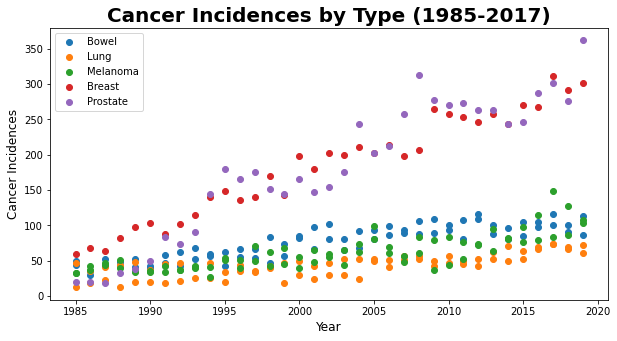

In [53]:
#removing the sex labelled as 'person' to decrease data ambiguity
cancer_male_female_incidence = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Incidence Male', 'Incidence Female'])]

#removing cancer from 'All sites' again to decrease ambiguity
cancer_incidences = cancer_male_female_incidence[cancer_male_female_incidence["CancerType"].str.contains("All sites C00-C96 excl C44") == False]

#plotting bowel cancer
bowel_incidences = cancer_incidences[cancer_incidences["CancerType"].isin(["Bowel C18-C20"])]
lung_incidences = cancer_incidences[cancer_incidences["CancerType"].isin(["Lung C33, C34"])]
melanoma_incidences = cancer_incidences[cancer_incidences["CancerType"].isin(["Melanoma of skin C43"])]
breast_incidences = cancer_incidences[cancer_incidences["CancerType"].isin(["Breast C50"])]
prostate_incidences = cancer_incidences[cancer_incidences["CancerType"].isin(["Prostate C61"])]

plt.scatter(bowel_incidences.year, bowel_incidences.NumberOfCases)
plt.scatter(lung_incidences.year, lung_incidences.NumberOfCases)
plt.scatter(melanoma_incidences.year, melanoma_incidences.NumberOfCases)
plt.scatter(breast_incidences.year, breast_incidences.NumberOfCases)
plt.scatter(prostate_incidences.year, prostate_incidences.NumberOfCases)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Cancer Incidences', fontsize = 12)
plt.title('Cancer Incidences by Type (1985-2017)', fontsize = 20, fontweight = "bold")
plt.legend(['Bowel', 'Lung', 'Melanoma', 'Breast', 'Prostate'])


gender

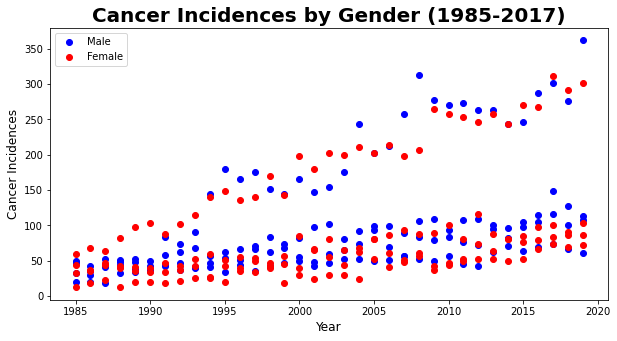

In [15]:
#separating male incidences and 'All Sites'
cancer_allmale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Incidence Male'])]
cancer_male = cancer_allmale[cancer_allmale["CancerType"].str.contains("All sites C00-C96 excl C44") == False]

#separating female incidences and 'All Sites'
cancer_allfemale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Incidence Female'])]
cancer_female = cancer_allfemale[cancer_allfemale["CancerType"].str.contains("All sites C00-C96 excl C44") == False]

plt.scatter(cancer_male.year, cancer_male.NumberOfCases, c="Blue")
plt.scatter(cancer_female.year, cancer_female.NumberOfCases, c="Red")
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Cancer Incidences', fontsize = 12)
plt.title('Cancer Incidences by Gender (1985-2017)', fontsize = 20, fontweight = "bold")
plt.legend(['Male', 'Female'])

total bar graph for better visualisation

Text(0.5, 1.0, 'Total Cancer Incidences by Gender (1985-2017)')

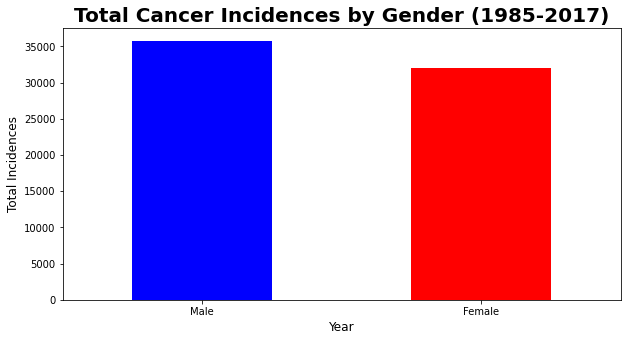

In [16]:
#adding male incidences
cancer_allmale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Incidence Male'])]
cancer_malesum = cancer_allmale['NumberOfCases'].sum()

#adding female incidences
cancer_allfemale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Incidence Female'])]
cancer_femalesum = cancer_allfemale['NumberOfCases'].sum()

#making the bar graph
bar_data = {"Gender":["Male", "Female"],
        "Total Incidences":[cancer_malesum, cancer_femalesum]}

dataFrame = pd.DataFrame(data=bar_data)

dataFrame.plot.bar(x="Gender", y="Total Incidences", rot=0, color=("Blue", "Red"), legend=False)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Incidences', fontsize = 12)
plt.title('Total Cancer Incidences by Gender (1985-2017)', fontsize = 20, fontweight = "bold")

Text(0.5, 1.0, 'Total Cancer Incidences by Type (1985-2017)')

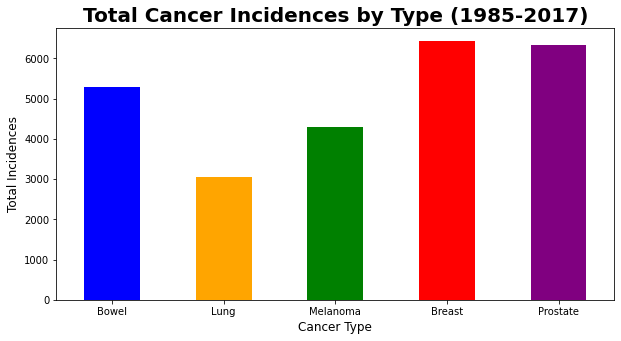

In [92]:
#creating sums of cancer types
bowel_sum = bowel_incidences["NumberOfCases"].sum()
lung_sum = lung_incidences["NumberOfCases"].sum()
melanoma_sum = melanoma_incidences["NumberOfCases"].sum()
breast_sum = breast_incidences["NumberOfCases"].sum()
prostate_sum = prostate_incidences["NumberOfCases"].sum()

#making the bar graph
bar_data = {"Cancer Type":["Bowel","Lung","Melanoma","Breast","Prostate"],
        "Total Incidences":[bowel_sum, lung_sum, melanoma_sum, breast_sum, prostate_sum]}

dataFrame = pd.DataFrame(data=bar_data)

dataFrame.plot.bar(x="Cancer Type", y="Total Incidences", rot=0, color=("Blue", "Orange", "Green", "Red", "Purple"), legend=False)
plt.xlabel('Cancer Type', fontsize = 12)
plt.ylabel('Total Incidences', fontsize = 12)
plt.title('Total Cancer Incidences by Type (1985-2017)', fontsize = 20, fontweight = "bold")

Text(0.5, 1.0, 'Total Cancer Incidences by Gender and Type (1985-2017)')

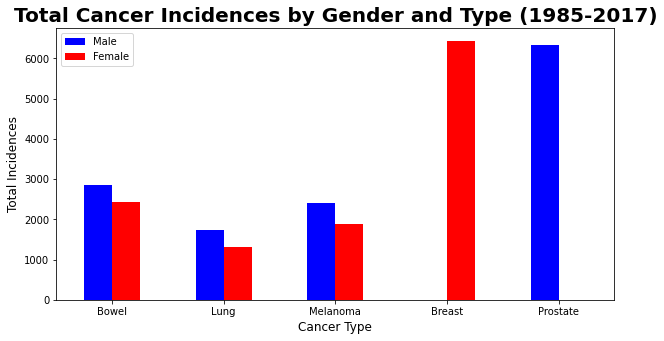

In [36]:
#creating separating by gender and type
bowel_male = cancer_allmale[cancer_allmale['CancerType'].isin(['Bowel C18-C20'])]
bowel_male_sum = bowel_male['NumberOfCases'].sum()

bowel_female = cancer_allfemale[cancer_allfemale['CancerType'].isin(['Bowel C18-C20'])]
bowel_female_sum = bowel_female['NumberOfCases'].sum()

lung_male = cancer_allmale[cancer_allmale['CancerType'].isin(['Lung C33, C34'])]
lung_male_sum = lung_male['NumberOfCases'].sum()

lung_female = cancer_allfemale[cancer_allfemale['CancerType'].isin(['Lung C33, C34'])]
lung_female_sum = lung_female['NumberOfCases'].sum()

melanoma_male = cancer_allmale[cancer_allmale['CancerType'].isin(['Melanoma of skin C43'])]
melanoma_male_sum = melanoma_male['NumberOfCases'].sum()

melanoma_female = cancer_allfemale[cancer_allfemale['CancerType'].isin(['Melanoma of skin C43'])]
melanoma_female_sum = melanoma_female['NumberOfCases'].sum()

breast_male = cancer_allmale[cancer_allmale['CancerType'].isin(['Breast C50'])]
breast_male_sum = breast_male['NumberOfCases'].sum()

breast_female = cancer_allfemale[cancer_allfemale['CancerType'].isin(['Breast C50'])]
breast_female_sum = breast_female['NumberOfCases'].sum()

prostate_male = cancer_allmale[cancer_allmale['CancerType'].isin(['Prostate C61'])]
prostate_male_sum = prostate_male['NumberOfCases'].sum()

prostate_female = cancer_allfemale[cancer_allfemale['CancerType'].isin(['Prostate C61'])]
prostate_female_sum = prostate_female['NumberOfCases'].sum()


#making the bar graph
bar_data = {"Male":[bowel_male_sum, lung_male_sum, melanoma_male_sum, breast_male_sum, prostate_male_sum],
        "Female":[bowel_female_sum, lung_female_sum, melanoma_female_sum, breast_female_sum, prostate_female_sum]}

index     = ["Bowel", "Lung", "Melanoma", "Breast", "Prostate"]

dataFrame = pd.DataFrame(data=bar_data, index=index)

dataFrame.plot.bar(rot=0, color=("Blue", "Red"))

plt.xlabel('Cancer Type', fontsize = 12)
plt.ylabel('Total Incidences', fontsize = 12)
plt.title('Total Cancer Incidences by Gender and Type (1985-2017)', fontsize = 20, fontweight = "bold")

Text(0.5, 1.0, 'Total Cancer Incidences and Mortalities by Gender (1985-2017)')

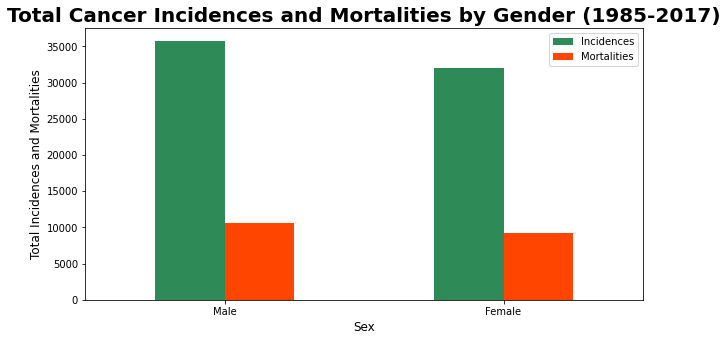

In [52]:
#adding male mortalities
mortality_allmale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Mortality Male'])]
mortality_malesum = mortality_allmale['NumberOfCases'].sum()

#adding female mortalities
mortality_allfemale = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Mortality Female'])]
mortality_femalesum = mortality_allfemale['NumberOfCases'].sum()

#making the bar graph
bar_data = {"Incidences":[cancer_malesum, cancer_femalesum],
        "Mortalities":[mortality_malesum, mortality_femalesum]}

index     = ["Male", "Female"]

dataFrame = pd.DataFrame(data=bar_data, index=index)

dataFrame.plot.bar(rot=0, color=("seagreen", "orangered"))

plt.xlabel('Sex', fontsize = 12)
plt.ylabel('Total Incidences and Mortalities', fontsize = 12)
plt.title('Total Cancer Incidences and Mortalities by Gender (1985-2017)', fontsize = 20, fontweight = "bold")

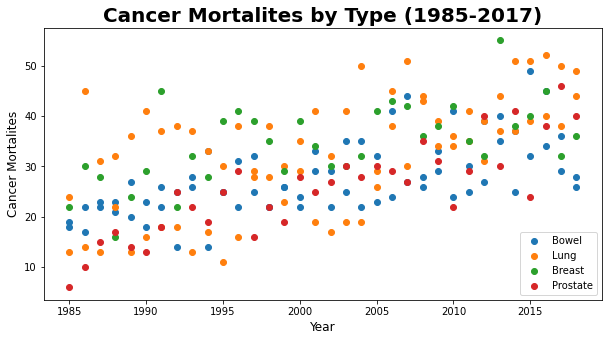

In [55]:
#removing the sex labelled as 'person' to decrease data ambiguity
cancer_male_female_mortality = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Mortality Male', 'Mortality Female'])]

#removing cancer from 'All sites' again to decrease ambiguity
cancer_mortalities = cancer_male_female_mortality[cancer_male_female_mortality["CancerType"].str.contains("All sites C00-C96 excl C44") == False]

#plotting bowel cancer
bowel_mortalities = cancer_mortalities[cancer_mortalities["CancerType"].isin(["Bowel C18-C20"])]
lung_mortalities = cancer_mortalities[cancer_mortalities["CancerType"].isin(["Lung C33, C34"])]
breast_mortalities = cancer_mortalities[cancer_mortalities["CancerType"].isin(["Breast C50"])]
prostate_mortalities = cancer_mortalities[cancer_mortalities["CancerType"].isin(["Prostate C61"])]

plt.scatter(bowel_mortalities.year, bowel_mortalities.NumberOfCases)
plt.scatter(lung_mortalities.year, lung_mortalities.NumberOfCases)
plt.scatter(breast_mortalities.year, breast_mortalities.NumberOfCases)
plt.scatter(prostate_mortalities.year, prostate_mortalities.NumberOfCases)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Cancer Mortalites', fontsize = 12)
plt.title('Cancer Mortalites by Type (1985-2017)', fontsize = 20, fontweight = "bold")
plt.legend(['Bowel', 'Lung', 'Breast', 'Prostate'])


In [96]:
#making bowel mortalities list by gender
bowel_mortalities_male = bowel_mortalities[bowel_mortalities["sex"].isin(["Male"])]
bowel_mortalities_malesum = bowel_mortalities_male['NumberOfCases'].sum()

bowel_mortalities_female = bowel_mortalities[bowel_mortalities["sex"].isin(["Female"])]
bowel_mortalities_femalesum = bowel_mortalities_female['NumberOfCases'].sum()

#doing box plot
mortality_everyone = cancer_data[cancer_data['IncidenceMortality_Sex'].isin(['Mortality Male']).(['Mortality Female'])]

mortality_everyone.head()



plt.xlabel('Cancer Mortalites', fontsize = 12)
plt.title('Cancer Mortalites by Type (1985-2017)', fontsize = 20, fontweight = "bold")


SyntaxError: invalid syntax (2885499031.py, line 9)